In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = pd.read_csv(r'C:\Users\Admin\Documents\Downloads\tips.csv')

In [3]:
tips.head()     # first 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# weekdays are present in the dataset
tips.day.unique()    # 4 weekdays are present

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [5]:
tips.describe()   

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
# last 5 rows:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [7]:
# dinner and lunches data are present in the dataset:

tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:>

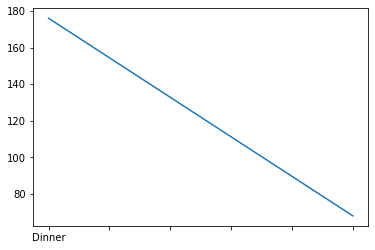

In [8]:
tips.time.value_counts().plot() 

<AxesSubplot:>

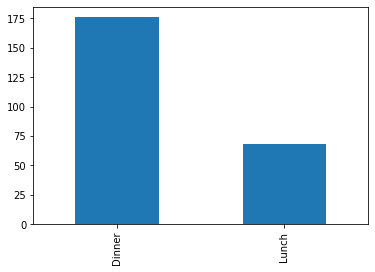

In [9]:
# this chart doesent make sense,so I change this to bar chart

tips.time.value_counts().plot(kind='bar')

In [10]:
# Dinner and lunch in percentage(%)
# we are providing a parameter is normalize=True
tips.time.value_counts(normalize=True)    # normalize is a value or it creates the praportion of value. 

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

In [11]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [12]:
tips.isnull()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [13]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [14]:
# when people pay more tips during lunch or dinner
# we are finding the average of tip
# groupby:-It is a function which allows us to rearrange the data by utilizing them to real world dataset. it split the data into various group

tips.groupby(['time'])['tip'].mean()    # groupby by dimension 
                                        # lunch and dinner is basically average.so in lunch we get 2.728 $ 
                                        # and in dinner we get 3.1026 $

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

<AxesSubplot:xlabel='time'>

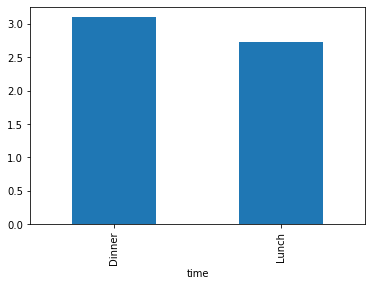

In [15]:
# we plot this value in bar chart 

tips.groupby(['time'])['tip'].mean().plot.bar()

In [16]:
tips.groupby(['sex'])['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

<AxesSubplot:xlabel='sex'>

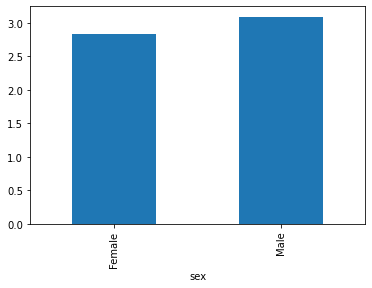

In [17]:
tips.groupby(['sex'])['tip'].mean().plot.bar()

In [18]:
# similarly we can find for average tips for - smoker/non smoker , day , size


In [19]:
# we creat a cross table 
# groupby:-It is a function which allows us to rearrange the data by utilizing them to real world dataset. it split the data into various group

tips.groupby(['smoker','sex'])['tip'].mean()

smoker  sex   
No      Female    2.773519
        Male      3.113402
Yes     Female    2.931515
        Male      3.051167
Name: tip, dtype: float64

In [20]:
##  If male smoke they tend to give more tips than female smoker. and vice versa

In [21]:
# we are put this in proper formating table.

tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Female,Male
smoker,,
No,2.773519,3.113402
Yes,2.931515,3.051167


In [22]:
# similarly we make a cross table of smoker and day

tips.groupby(['smoker','day'])['tip'].mean().unstack()   # unstack retains dataframe

day,Fri,Sat,Sun,Thur
smoker,,,,
No,2.8125,3.102889,3.167895,2.673778
Yes,2.7140,2.875476,3.516842,3.030000


#### creat a new column to find the % of tip compare to total bill

In [23]:
tips['tip_percentage'] = tips.tip / tips.total_bill * 100

In [24]:
tips.head()  # newly created column we get

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [25]:
# now all the analysis of tip now tip_percentage
# we analysed sex column with tip_percentage
# similarly we analysed smoker , day , time , size column with tip_percentage.
tips.groupby(['sex'])['tip_percentage'].mean()

sex
Female    16.649074
Male      15.765055
Name: tip_percentage, dtype: float64

<AxesSubplot:xlabel='sex'>

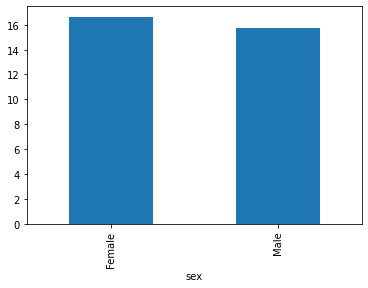

In [26]:
tips.groupby(['sex'])['tip_percentage'].mean().plot.bar()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

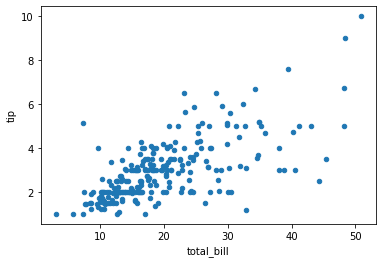

In [27]:
# lets we visualize the relationship between total bill and tips

tips.plot.scatter(x = 'total_bill' , y = 'tip')   # this is pandas library

<AxesSubplot:xlabel='tip_percentage', ylabel='day'>

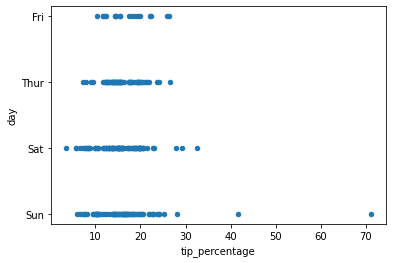

In [28]:
tips.plot.scatter(x = 'tip_percentage' , y = 'day')

### Visualizing using sns library 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

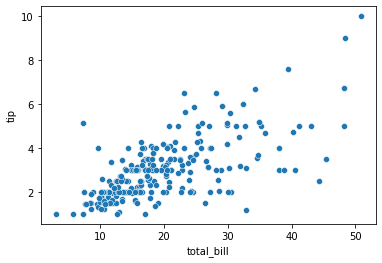

In [29]:
sns.scatterplot(x = 'total_bill' , y = 'tip' ,data = tips)   # a very smililar representation noting will 
                                                            # be chnage except bubble border .

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

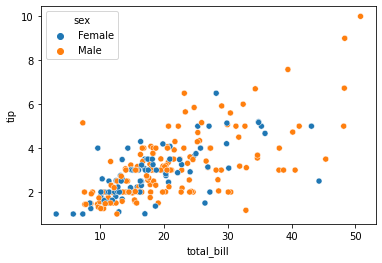

In [30]:
# add the effect of column sex to understand the data better.
# visualization by sex
sns.scatterplot(x = 'total_bill' , y = 'tip' ,data = tips , hue = 'sex')   # hue is the column

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

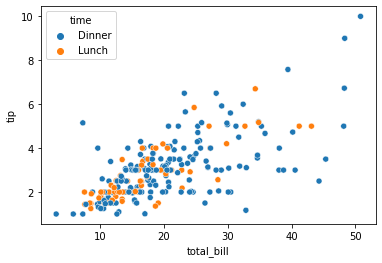

In [31]:
# similarly we see the visualization by time

sns.scatterplot(x = 'total_bill' , y = 'tip' ,data = tips , hue = 'time') 

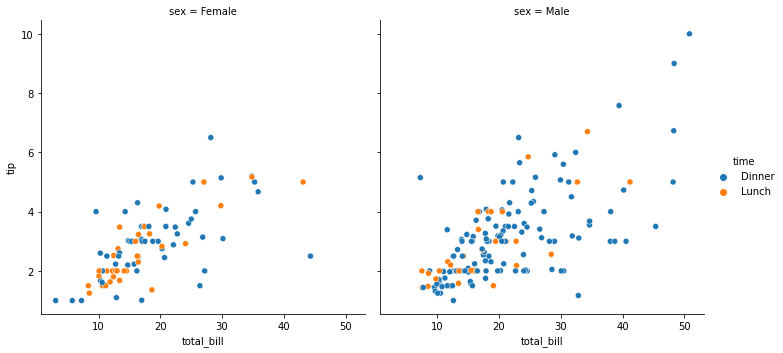

In [32]:
# bifurcate the time on sex


sns.relplot(x = 'total_bill' , y = 'tip' , data = tips , col = 'sex' , hue ='time')

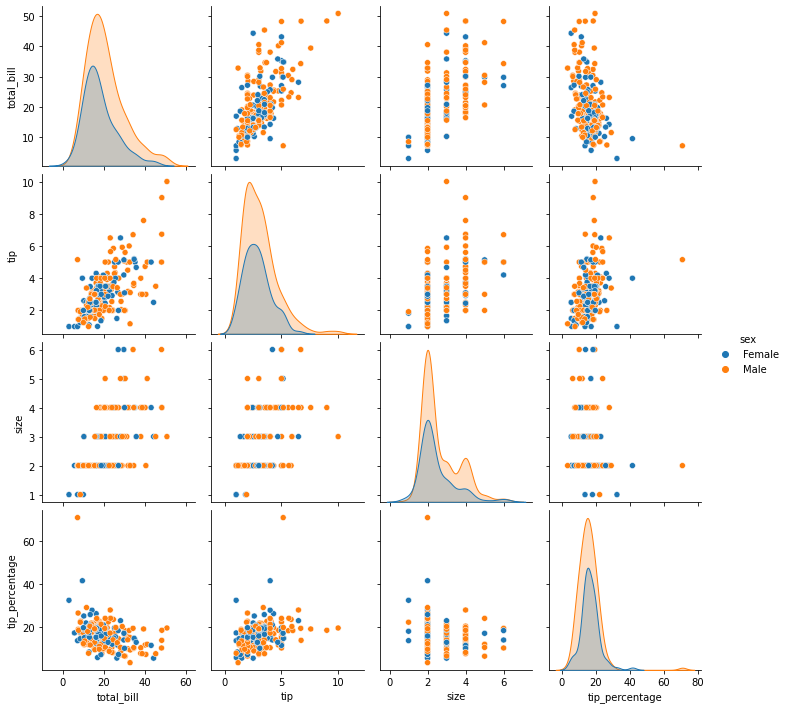

In [33]:
# Creating corellation and distribution for all the numeric variables by sex

sns.pairplot(data = tips , hue = 'sex')  # hue is colour specifing the addition of column

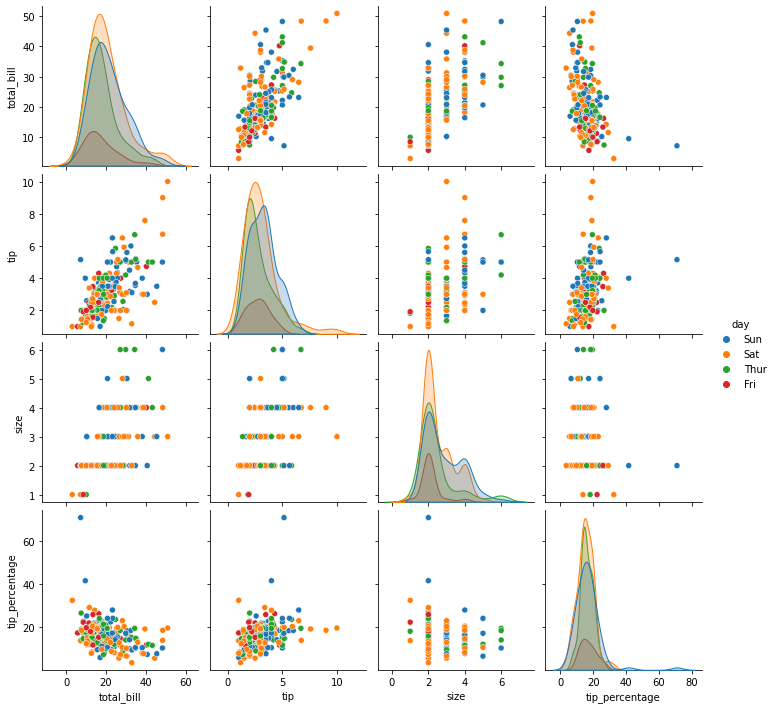

In [34]:
sns.pairplot(data = tips , hue = 'day')